In [23]:
import pandas as pd
import seaborn as sns 
import numpy as np

# Project overview
In this project, I build a Simple Linear Regression model to study the linear relationship between 

In [24]:
df = pd.read_csv("Customer Purchasing Behaviors.csv")

In [25]:
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


In [26]:
df.shape

(238, 7)

In [27]:
df.isnull().sum()

user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB


In [29]:
df["loyalty_score"]

0      4.5
1      7.0
2      8.0
3      3.0
4      4.8
      ... 
233    7.2
234    6.9
235    9.4
236    5.8
237    5.6
Name: loyalty_score, Length: 238, dtype: float64

In [30]:
df["region"]

0      North
1      South
2       West
3       East
4      North
       ...  
233     West
234    North
235    South
236     West
237    North
Name: region, Length: 238, dtype: object

In [31]:
df.describe()

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,6.794118,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.899047,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,8.275000,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.500000,28.000000


# CLEAN THE DATASET

In [32]:
df.drop("region" , axis = 1 , inplace = True)

In [33]:
df

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
0,1,25,45000,200,4.5,12
1,2,34,55000,350,7.0,18
2,3,45,65000,500,8.0,22
3,4,22,30000,150,3.0,10
4,5,29,47000,220,4.8,13
...,...,...,...,...,...,...
233,234,40,60000,450,7.2,20
234,235,38,59000,430,6.9,20
235,236,54,74000,630,9.4,27
236,237,32,52000,360,5.8,18


# EDA 

<Axes: xlabel='loyalty_score', ylabel='annual_income'>

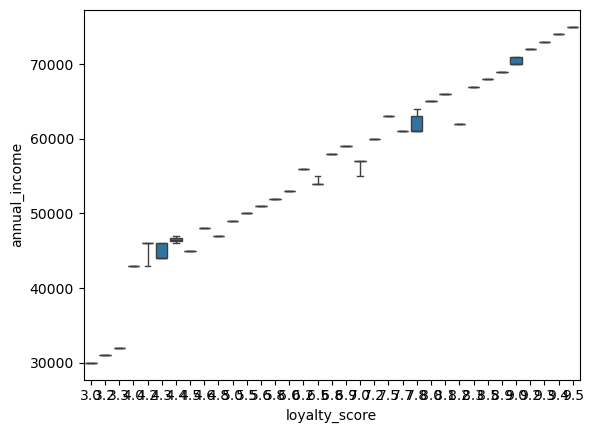

In [34]:
import seaborn as sns
sns.boxplot(data = df , x = "loyalty_score" , y = "annual_income" , whis = (0,100))

<Axes: >

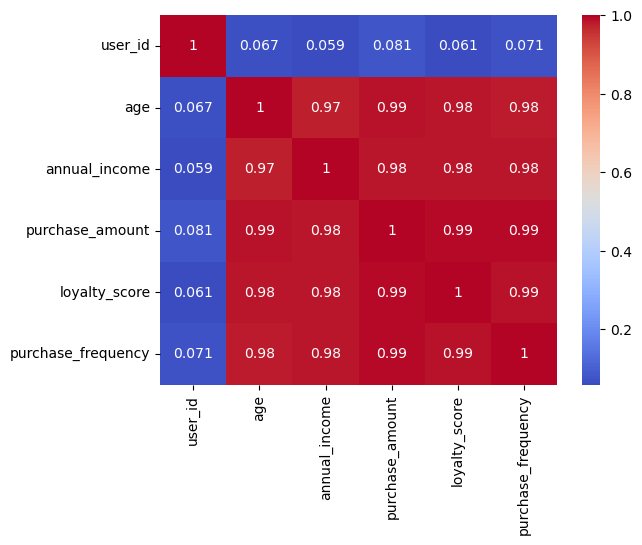

In [35]:
sns.heatmap(df.corr() ,annot = True,cmap='coolwarm')

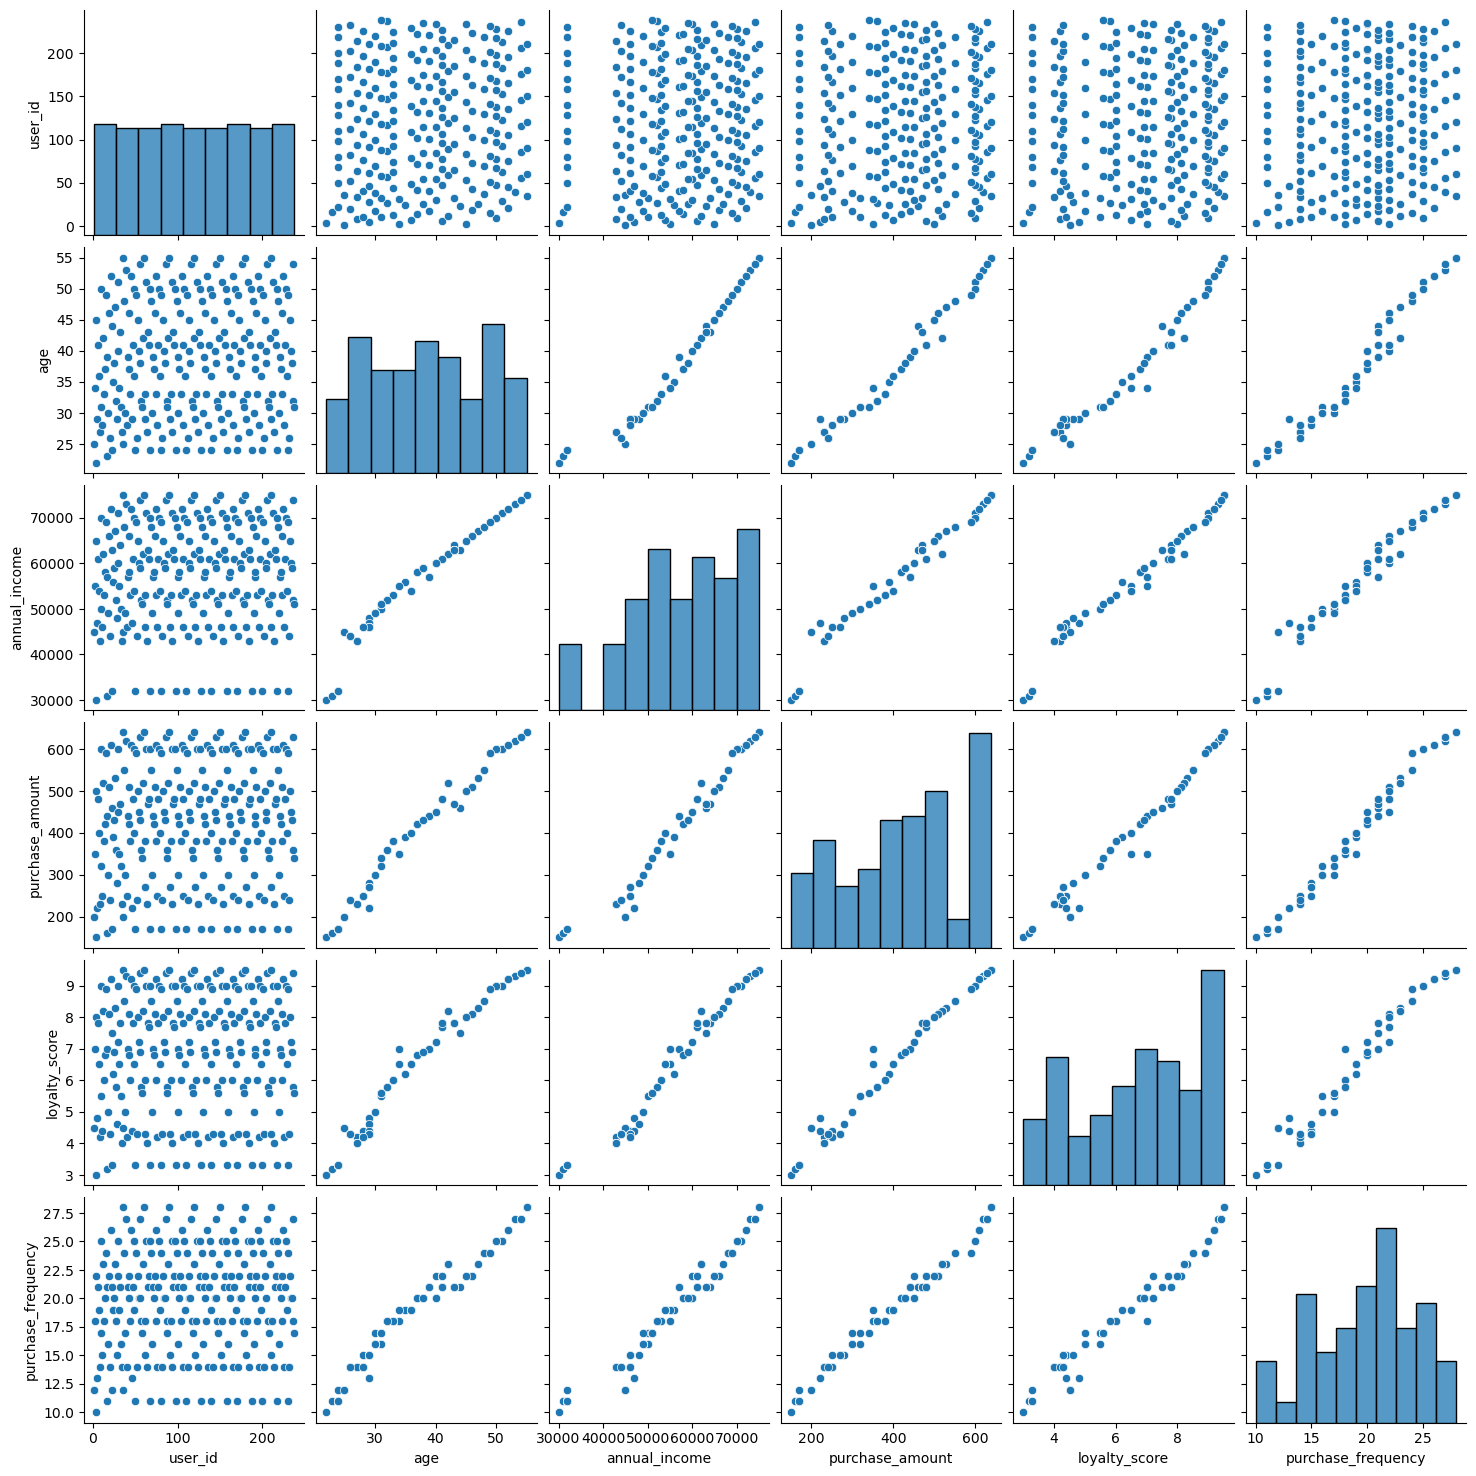

In [36]:
sns.pairplot(df)

In [37]:
df.drop("user_id" , axis = 1 , inplace = True)

In [38]:
df

,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
0,25,45000,200,4.5,12
1,34,55000,350,7.0,18
2,45,65000,500,8.0,22
3,22,30000,150,3.0,10
4,29,47000,220,4.8,13
...,...,...,...,...,...
233,40,60000,450,7.2,20
234,38,59000,430,6.9,20
235,54,74000,630,9.4,27
236,32,52000,360,5.8,18


In [41]:
x = df.drop("purchase_amount", axis = 1)
y = df["purchase_amount"]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.20 , random_state = 42)

In [49]:
x_train.shape

(190, 4)

In [48]:
x_test.shape

(48, 4)

In [50]:
from sklearn.linear_model import LinearRegression

In [71]:
lr = LinearRegression(fit_intercept=True)

In [72]:
lr

LinearRegression()

In [73]:
lr.fit(x_train , y_train)

LinearRegression()

In [74]:
x_train

,age,annual_income,loyalty_score,purchase_frequency
184,43,63000,7.8,21
224,52,72000,9.2,26
194,52,72000,9.2,26
95,41,61000,7.7,22
227,50,70000,9.0,25
...,...,...,...,...
106,41,61000,7.8,21
14,49,69000,8.9,24
92,51,71000,9.0,25
179,55,75000,9.5,28


In [75]:
y_pred = lr.predict(x_test)

In [76]:
y_pred

array([635.46437984, 163.04133626, 590.34108187, 588.37558812,
       400.62298184, 570.08112889, 331.7907822 , 511.8200594 ,
       506.57012277, 425.27255613, 235.7423669 , 588.37558812,
       396.47822364, 449.03072269, 444.37806579, 635.46437984,
       430.52249276, 430.52249276, 356.58287029, 243.48768799,
       335.00396818, 262.49994874, 243.48768799, 635.46437984,
       263.74764097, 300.35855145, 444.37806579, 168.29127288,
       244.13423261, 533.39896151, 483.02572691, 588.37558812,
       262.49994874, 511.8200594 , 554.97786362, 262.49994874,
       520.28704989, 635.46437984, 430.52249276, 365.1172498 ,
       506.57012277, 239.6240895 , 449.03072269, 235.7423669 ,
       168.29127288, 588.37558812, 630.21444322, 168.29127288])

In [77]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [78]:
print(mean_absolute_error(y_test , y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

7.368217578136671
109.41175530955961
0.995128195868992


In [79]:
a = lr.coef_
b = lr.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b)

Estimated model slope, a: [ 2.03675065e+00 -7.12568997e-05  3.28444288e+01  1.30445226e+01]
Estimated model intercept, b: (-130.18688555215977,)


In [80]:
residuals = y_test - y_pred

In [81]:
residuals

115    -5.464380
15     -3.041336
212     9.658918
126    11.624412
6      -0.622982
170    19.918871
9     -11.790782
222    -1.820059
112    -6.570123
221    -5.272556
183    -5.742367
137    11.624412
30    -46.478224
190    -9.030723
113     5.621934
55     -5.464380
24     -0.522493
204    -0.522493
86      3.417130
19     -3.487688
207     4.996032
120     7.500051
141    -3.487688
235    -5.464380
10    -13.747641
219    -0.358551
173     5.621934
109     1.708727
75      5.865767
25     -3.398962
124   -13.025727
186    11.624412
180     7.500051
18     -1.820059
68     -4.977864
60      7.500051
148    -0.287050
205    -5.464380
114    -0.522493
73     14.882750
82     -6.570123
45    -19.624090
16     -9.030723
93     -5.742367
199     1.708727
167    11.624412
38    -10.214443
127     1.708727
Name: purchase_amount, dtype: float64

Text(0.5, 1.0, 'Residuals vs Fitted Values')

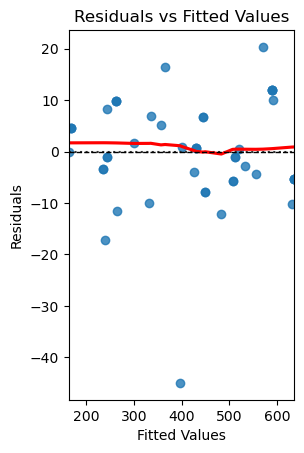

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')